In [1]:
%%capture
from jupyter_tikz import TexFragment
import os, sys
from IPython.display import display, HTML, Markdown, Math

# To find local version of the library
sys.path.append('../src')

from pmule import PredecessorTable, ProjectGraph
%mkdir -p ~/temp
%cd ~/temp

In [2]:
def pinta_tikz(dibujo, filename=None):
    if filename is not None:
        display(TexFragment(dibujo, tikz_libraries='patterns').run_latex(save_pdf=filename+'.pdf', save_svg=filename+'.svg'))
    else:
        display(TexFragment(dibujo, tikz_libraries='patterns').run_latex())

# Enunciado

Considere el proyecto cuya información se adjunta.

In [3]:
 pregunta_1 = "1. Determine para cada actividad su duración optimista. ¿Influye esta duración optimista en la duración mínima del proyecto?  "
 pregunta_2 = "2. Determine duración media del proyecto y su varianza utilizando para ello la aproximación del teorema del límite central.  "
 pregunta_3 = "3. Determine la probabilidad de que el proyecto se termine antes de 10 periodos.  "
 pregunta_4 = "4. Planifique el proyecto teniendo en cuenta que durante las primeras tres semanas dispondrá de cuatro trabajadores y a partir de la cuarta de seis trabajadores.  "
 pregunta_5 = "5. ¿Sería suficiente disponer de 4 recursos durante todo el proyecto? ¿Por qué?  "

In [4]:
display(Markdown(pregunta_1))
display(Markdown(pregunta_2))
display(Markdown(pregunta_3))
display(Markdown(pregunta_4))
display(Markdown(pregunta_5))

1. Determine para cada actividad su duración optimista. ¿Influye esta duración optimista en la duración mínima del proyecto?  

2. Determine duración media del proyecto y su varianza utilizando para ello la aproximación del teorema del límite central.  

3. Determine la probabilidad de que el proyecto se termine antes de 10 periodos.  

4. Planifique el proyecto teniendo en cuenta que durante las primeras tres semanas dispondrá de cuatro trabajadores y a partir de la cuarta de seis trabajadores.  

5. ¿Sería suficiente disponer de 4 recursos durante todo el proyecto? ¿Por qué?  

In [5]:
%%capture
from jupyter_tikz import TexFragment
import os, sys
from IPython.display import display, HTML, Markdown


"""
!apt install libgraphviz-dev              > /dev/null
%pip install pygraphviz "pandas[excel]"   > /dev/null
%pip install numpyarray_to_latex          > /dev/null

#!apt-get install -y texlive-latex-extra   > /dev/null
#!apt-get install -y poppler-utils         > /dev/null

repo_url = 'https://github.com/mcasl/pmULE'
repo_name = "pmULE"


if not os.path.exists(repo_name):
    print(f"Cloning repository '{repo_name}'...")
    !git clone {repo_url}
    print("Repository cloned successfully!")
else:
    print(f"Good! No need to download '{repo_name}' again.")

from google.colab import files
"""
# To find local version of the library
sys.path.append('../src')

from pmule import PredecessorTable, ProjectGraph
%mkdir -p ~/temp
%cd ~/temp

In [6]:
def pinta_tikz(dibujo, filename=None):
    if filename is not None:
        display(TexFragment(dibujo, tikz_libraries='patterns').run_latex(save_pdf=filename+'.pdf', save_svg=filename+'.svg'))
    else:
        display(TexFragment(dibujo, tikz_libraries='patterns').run_latex())

In [7]:
import pandas as pd
import numpy as np

datos_enunciado = pd.DataFrame([
#  nombre, anteriores, duracion, duracion_pesimista, duracion_modal, recursos
     ('A',       '---  ',     2,         2,                    2,           1  ),
     ('B',       'A    ',     2,         3,                    2,           2  ),
     ('C',       'B    ',     3,         4,                    3,           2  ),
     ('D',       'B,J  ',     4,         5,                 17/4,           1  ),
     ('E',       'F,B,J',     1,         1,                    1,           1  ),
     ('F',       'A    ',     2,         3,                    2,           2  ),
     ('G',       'C,D  ',     1,         1,                    1,           1  ),
     ('H',       'E    ',     4,         5,                    4,           1  ),
     ('I',       'B,J  ',     1,         1,                    1,           1  ),
     ('J',       'A    ',     2,         2,                    2,           1  ),
] ,columns=['activity', 'predecessor', 'duration', 'pesimistic_duration', 'modal_duration', 'resources'])
datos_enunciado.set_index('activity', inplace=True)
datos_enunciado

,predecessor,duration,pesimistic_duration,modal_duration,resources
activity,,,,,
A,---,2,2,2.00,1
B,A,2,3,2.00,2
C,B,3,4,3.00,2
D,"B,J",4,5,4.25,1
E,"F,B,J",1,1,1.00,1
F,A,2,3,2.00,2
G,"C,D",1,1,1.00,1
H,E,4,5,4.00,1
I,"B,J",1,1,1.00,1


# Solución
## Apartado 1


In [8]:
display(Markdown(pregunta_1))

1. Determine para cada actividad su duración optimista. ¿Influye esta duración optimista en la duración mínima del proyecto?  

A partir de los datos del enunciado y de la relación $D=\frac{a+4m+b}{6}$ obtenemos la duración optimista $a=6D-b-4m$.

In [9]:
datos_proyecto = datos_enunciado.copy()
datos_proyecto['optimistic_duration'] = datos_proyecto.eval('6*duration - pesimistic_duration - 4*modal_duration')
datos_proyecto[['optimistic_duration']].T

activity,A,B,C,D,E,F,G,H,I,J
optimistic_duration,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,2.0


## Apartado 2


In [10]:
display(Markdown(pregunta_2))

2. Determine duración media del proyecto y su varianza utilizando para ello la aproximación del teorema del límite central.  

### Cuadro de prelaciones

In [11]:
#| tbl-cap: "Cuadro de prelaciones expandido"
#| label: tbl-prelaciones
prelaciones = PredecessorTable.from_dataframe_of_strings(datos_proyecto, activity='activity', predecessor='predecessor')
prelaciones.display_immediate_linkage_matrix()

,A,B,C,D,E,F,G,H,I,J
activities,,,,,,,,,,
A,,,,,,,,,,
B,True,,,,,,,,,
C,,True,,,,,,,,
D,,True,,,,,,,,True
E,,True,,,,True,,,,True
F,True,,,,,,,,,
G,,,True,True,,,,,,
H,,,,,True,,,,,
I,,True,,,,,,,,True


### Grafo PERT con numeración de nodos

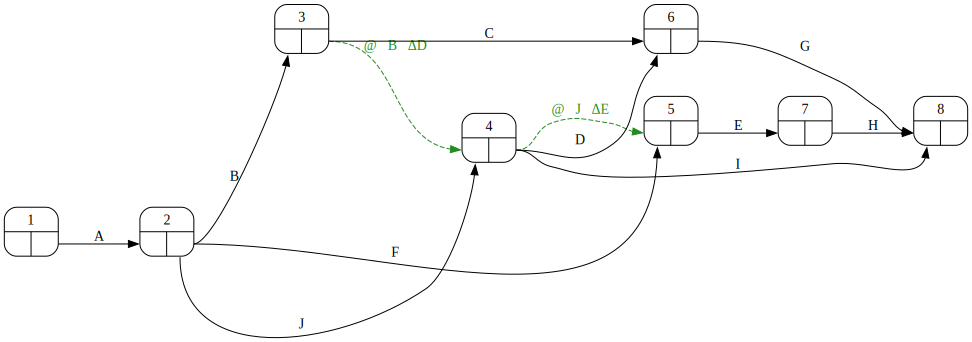

In [30]:
#| fig-cap: "Grafo Pert con indicación con indicación de los números de nodos"
#| label: fig-pertNumeracionNodos
proyecto = prelaciones.create_project()
proyecto.pert(ranksep=1.0)

### Matriz de Zaderenko

In [13]:
#| tbl-cap: "Matriz de Zaderenko para el cálculo de tiempos tempranos y tardíos"
#| label: tbl-Zaderenko
proyecto.zaderenko(durations=datos_proyecto['duration'])

,1,2,3,4,5,6,7,8,early
1,,2.0,,,,,,,0.0
2,,,2.0,2.0,2.0,,,,2.0
3,,,,0.0,,3.0,,,4.0
4,,,,,0.0,4.0,,1.0,4.0
5,,,,,,,1.0,,4.0
6,,,,,,,,1.0,8.0
7,,,,,,,,4.0,5.0
8,,,,,,,,,9.0
late,0.0,2.0,4.0,4.0,4.0,8.0,5.0,9.0,


Los tiempos tempranos y tardios han resultado ser:

In [14]:
#| tbl-cap: "Valores de los tiempos tempranos y tardíos de los nodos"
#| label: tbl-TempranosTardios
duraciones_medias = datos_proyecto['duration']
resultados_pert = proyecto.calculate_pert(durations=duraciones_medias)
resultados_pert['nodes'].T

,1,2,3,4,5,6,7,8
early,0,2,4,4,4,8,5,9
late,0,2,4,4,4,8,5,9


In [15]:
duracion_media_proyecto = int(proyecto.duration(durations=duraciones_medias))

In [16]:
Markdown(f"La duración media del proyecto es: {duracion_media_proyecto} periodos")

La duración media del proyecto es: 9 periodos

### Varianza de la duración del proyecto
Para determinar la varianza de la duración del proyecto es necesario determinar la varianza de cada rama del camino crítico. Para ello nos hará falta calcular la holgura total de cada actividad y así determinar el camino crítico. 

#### Holguras

In [17]:
#| tbl-cap: "Valor de la holgura total de las actividades"
#| label: tbl-htotal
resultados_pert['activities'][['H_total']].T

,@∇B⤑ΔD,@∇J⤑ΔE,A,B,C,D,E,F,G,H,I,J
H_total,0,0,0,0,1,0,0,0,0,0,4,0


Las actividades con holgura total igual a cero forman el camino crítico

### Grafo PERT con indicación del camino crítico

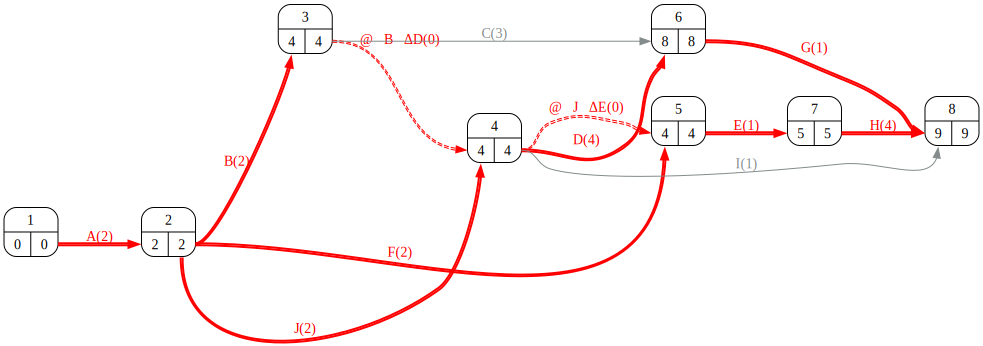

In [18]:
#| fig-cap: "Grafo Pert con indicación del camino crítico"
#| label: fig-pertrutasCriticas
proyecto.pert(durations=duraciones_medias, ranksep=0.8)

In [19]:
#| tbl-cap: "Rutas del camino crítico"
#| label: tbl-rutasCriticas
camino_critico = proyecto.critical_path(durations=duraciones_medias)
for key, value in camino_critico.items():
    print(f"{key}: ", ", ".join(value))

Route_2:  A, B, D, G
Route_3:  A, B, E, H
Route_5:  A, E, F, H
Route_6:  A, D, G, J
Route_7:  A, E, H, J


### Varianza del proyecto

La varianza de cada actividad no es aportada por el enunciado como dato, pero sí se puede calcular a partir de la expresión $\sigma^2 = \left(\frac{b-a}{6} \right)$

In [20]:
#| tbl-cap: "Cálculo de la varianza de la duración de las actividades"
#| label: tbl-varianzas
datos_proyecto['variance'] = (((datos_proyecto['pesimistic_duration'] - datos_proyecto['optimistic_duration'])/6)**2).round(2)
datos_proyecto[['pesimistic_duration', 'optimistic_duration', 'variance']]

,pesimistic_duration,optimistic_duration,variance
activity,,,
A,2,2.0,0.00
B,3,1.0,0.11
C,4,2.0,0.11
D,5,2.0,0.25
E,1,1.0,0.00
F,3,1.0,0.11
G,1,1.0,0.00
H,5,3.0,0.11
I,1,1.0,0.00


In [21]:
desviacion_proyecto = proyecto.standard_deviation(durations = datos_proyecto['duration'],
                                                  variances = datos_proyecto['variance'])
Markdown(f"La desviación típica de la duración del proyecto es la máxima desviación típica de las rutas críticas. Para este proyecto es {round(desviacion_proyecto,2)}")

Variance path: Route_2 : 0.36
Variance path: Route_3 : 0.22
Variance path: Route_5 : 0.22
Variance path: Route_6 : 0.25
Variance path: Route_7 : 0.11
Project duration variance: 0.36
Project duration standard deviation: 0.6


La desviación típica de la duración del proyecto es la máxima desviación típica de las rutas críticas. Para este proyecto es 0.6

## Apartado 3

In [22]:
display(Markdown(pregunta_3))

3. Determine la probabilidad de que el proyecto se termine antes de 10 periodos.  

In [23]:
import scipy
from scipy.stats import norm

probabilidad_de_terminar_antes_de_10 = norm.cdf(10, loc=duracion_media_proyecto, scale=desviacion_proyecto)
Markdown(f"Para un proyecto con duración media {duracion_media_proyecto} y desviación típica {round(desviacion_proyecto, 2)} el valor de la probabilidad pedida es {round(probabilidad_de_terminar_antes_de_10 * 100, 2)} por ciento.")

Para un proyecto con duración media 9 y desviación típica 0.6 el valor de la probabilidad pedida es 95.22 por ciento.

## Apartado 4

In [24]:
display(Markdown(pregunta_4))

4. Planifique el proyecto teniendo en cuenta que durante las primeras tres semanas dispondrá de cuatro trabajadores y a partir de la cuarta de seis trabajadores.  

### Análisis de la situación inicial

Para responder este apartado es necesario representar la demanda de recursos a lo largo del tiempo.

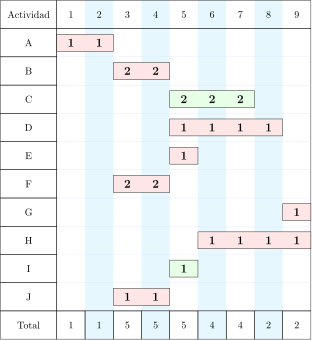

In [25]:
#| fig-cap: "Distribución inicial del consumo de recursos"
#| label: fig-recursosInicial
datos_proyecto[['duration',
                'pesimistic_duration',
                'resources',
                'optimistic_duration']] = datos_proyecto[['duration', 'pesimistic_duration', 
                                                            'resources', 'optimistic_duration']].astype(int)
proyecto_asignacion = proyecto.copy()
gantt_df, dibujo = proyecto.gantt(datos_proyecto,
                      duration_label='duration',
                      resource_label='resources',
                      total='fila',
                      tikz=True,
                      params=dict(
                        period_width=1,
                        row_height=1,
                        #background_horizontal_line_color='gray',
                        #background_vertical_bars_color='white!92!cyan',
                        activity_relative_height=0.6,
                        critical_background_color='white!90!red',
                        regular_background_color='white!90!green',
                        regular_text_color='black',
                        critical_text_color='black',
                        activity_inner_text_style=r"\bfseries\large",),
                    )
pinta_tikz(dibujo)

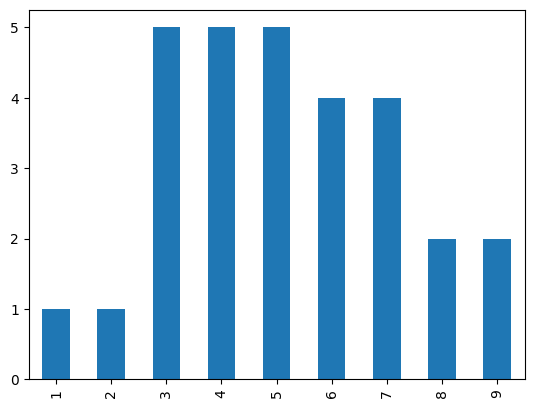

In [26]:
#| label: fig-barras-recursos
#| fig-cap: "Consumo de recursos en los distintos periodos"
gantt_df.data.loc['Total'].plot(kind='bar');

La demanda de recursos actual infringe el límite impuesto en el enunciado. Es necesario aplicar el algoritmo de asignación.

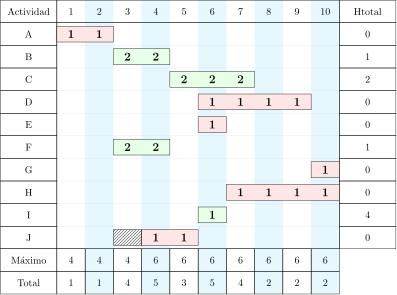

In [27]:
#| fig-cap: "Planificación del proyecto tras aplicar el algoritmo de asignación"
#| label: fig-asignacion46
proyecto_asignacion = proyecto.copy()
gantt_df, dibujo = proyecto_asignacion.asignar(data=datos_proyecto,
                                              duration_label='duration',
                                              resource_label='resources',
                                              maximo = [4,4,4,6],
                                              report = False,
                                              params = dict(
                                                  period_width=1
                                                  )
                                              )
pinta_tikz(dibujo)

En estas condiciones el proyecto ya es compatible con las restricciones impuestas a los recursos.

## Apartado 5

In [28]:
display(Markdown(pregunta_5))

5. ¿Sería suficiente disponer de 4 recursos durante todo el proyecto? ¿Por qué?  

Se analiza la posibilidad de reprogramar el proyecto atendiendo al límite de 4 recursos a lo largo de todo el proyecto.

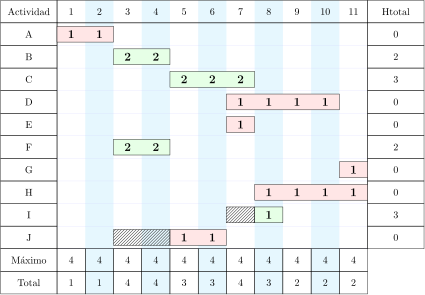

In [29]:
#| fig-cap: "Planificación del proyecto tras aplicar el algoritmo de asignación con el nuevo límite"
#| label: fig-asignacion444
proyecto_asignacion = proyecto.copy()
gantt_df, dibujo = proyecto_asignacion.asignar(data=datos_proyecto,
                                              duration_label='duration',
                                              resource_label='resources',
                                              maximo = [4,4,4],
                                              report = False,
                                              params = dict(
                                                  period_width=1
                                                  )
                                              )
pinta_tikz(dibujo)

En estas condiciones el proyecto ya es viable con 4 recursos. No obstante su duración se ha prolongado hasta 11 periodos.